In [34]:
#Social_Network_Ads.csv

**Importing the libraries**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [36]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [37]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [38]:
X = data.drop(columns=['Purchased','User ID'],axis=1)
Y = data['Purchased']


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
print(x_train.shape)
print(x_test.shape)

(320, 3)
(80, 3)


**Feature Scaling**

In [41]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [42]:
classifier = DecisionTreeClassifier()

In [43]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [44]:
ypred = classifier.predict(x_test)
accuracy_score(y_test,ypred)*100

83.75

**Making the Confusion Matrix**

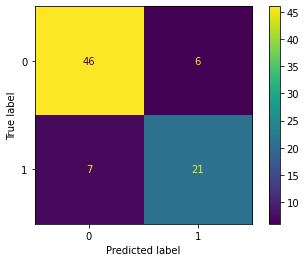

In [45]:
ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test)
plt.show()

**Visualising the Training set results**

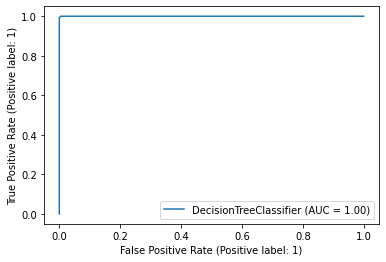

In [46]:
RocCurveDisplay.from_estimator(classifier,x_train,y_train)

**Visualising the Test set results**

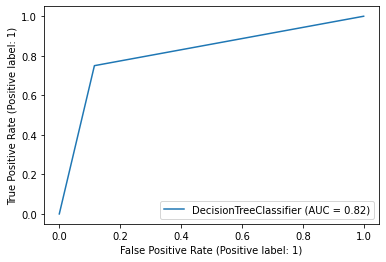

In [47]:
RocCurveDisplay.from_estimator(classifier,x_test,y_test)